In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [35]:
np.random.seed(0)

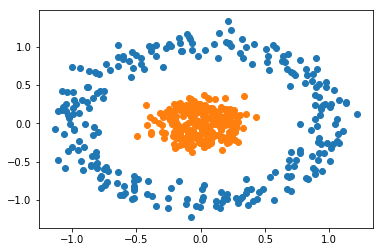

In [39]:
n_pts = 500
X, y = datasets.make_circles(n_samples=n_pts, random_state=123, noise=0.1, factor=0.2)
#print (X, y)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()


In [40]:
model = Sequential()
# model.add(Dense(4, input_shape=(2,), activation='sigmoid'))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(Adam(lr = 0.01), loss='binary_crossentropy', metrics=['accuracy'])

model.add(Dense(units=4, input_shape=(2,), activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))
adam = Adam(lr=0.01)
model.compile(adam, loss='binary_crossentropy', metrics=['accuracy'])
h = model.fit(x=X, y=y, verbose=1, batch_size=50, epochs=100, shuffle='true')


Epoch 1/100
500/500 [==============================] - 1s 1ms/step - loss: 0.6991 - acc: 0.4560
Epoch 2/100
500/500 [==============================] - 0s 52us/step - loss: 0.6933 - acc: 0.4480
Epoch 3/100
500/500 [==============================] - 0s 51us/step - loss: 0.6935 - acc: 0.6800
Epoch 4/100
500/500 [==============================] - 0s 52us/step - loss: 0.6932 - acc: 0.6920
Epoch 5/100
500/500 [==============================] - 0s 59us/step - loss: 0.6944 - acc: 0.4260
Epoch 6/100
500/500 [==============================] - 0s 53us/step - loss: 0.6928 - acc: 0.3540

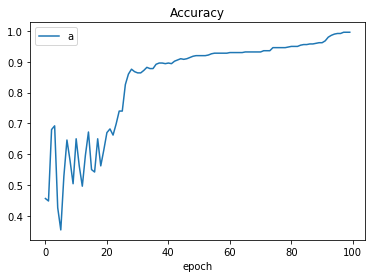

In [42]:
plt.plot(h.history['acc'])
plt.title('Accuracy')
# plt.legend('accuracy', color='b')
plt.legend('acc')
plt.xlabel('epoch')
plt.show()

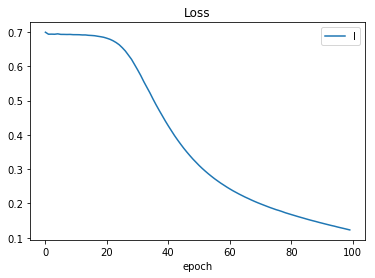

In [43]:
plt.plot(h.history['loss'])
plt.title('Loss')
plt.legend('loss')
plt.xlabel('epoch')
plt.show()

Prediction is:  [[0.12975518]]


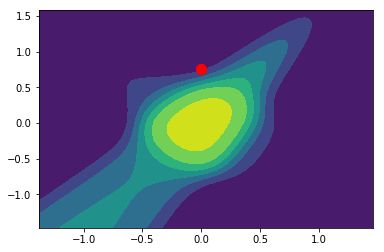

In [45]:
def plot_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:,0]) - 0.25, max(X[:,0]) + 0.25)
    y_span = np.linspace(min(X[:,1]) - 0.25, max(X[:,1]) + 0.25)
    xx, yy = np.meshgrid(x_span, y_span)
    grid = np.c_[xx.ravel(), yy.ravel()]
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)
plot_decision_boundary(X, y, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plot_decision_boundary(X, y, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
 
x = 0
y = 0.75
 
point = np.array([[x, y]])
predict = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color="red")
print("Prediction is: ", predict)
plt.show()